In [1]:
from __future__ import annotations

import geopandas as gpd

from slope_area._typing import SlopeProviders
from slope_area.enums import Column, SlopeAreaMethod
from slope_area.features import Outlets
from slope_area.geomorphometry import DefaultSlopeProviders
from slope_area.logger import create_logger
from slope_area.paths import PROJ_ROOT
from slope_area.plot import SlopeAreaPlotConfig
from slope_area.trial import (
    AnalysisConfig,
    HydrologicAnalysisConfig,
    OutletTrialFactory,
    ResolutionTrialFactory,
    TrialFactoryContext,
)

logger = create_logger(__name__)

10:22:33 DEBUG slopeArea.slope_area.config          is_notebook(): Code is running in notebook


# Paths

In [2]:
dem = PROJ_ROOT / 'data' / 'raw' / 'copdem_30m.tif'
outlets_path = PROJ_ROOT / 'data' / 'raw' / 'copdem_30m_outlets.shp'

out_dir = PROJ_ROOT / 'data' / 'processed' / '03_custom_slope_providers'
out_dir_outlet = out_dir / 'outlet'
out_dir_resolution = out_dir / 'resolution'

out_fig_outlet = out_dir_outlet / 'slope_area.png'
out_fig_resolution = out_dir_resolution / 'slope_area.png'

assert dem.exists()
assert outlets_path.exists()

# Slope providers (SAGA Version: 9.8.0)

In [3]:
slope_providers: SlopeProviders = {
    method_name: DefaultSlopeProviders.SAGASlope(method=i)
    for i, method_name in enumerate(
        (
            'maximum slope (Travis et al. 1975)',
            'maximum triangle slope (Tarboton 1997)',
            'least squares fitted plane (Horn 1981, Costa-Cabral & Burgess 1996)',
            '6 parameter 2nd order polynom (Evans 1979)',
            '6 parameter 2nd order polynom (Heerdegen & Beran 1982)',
            '6 parameter 2nd order polynom (Bauer, Rohdenburg, Bork 1985)',
            '9 parameter 2nd order polynom (Zevenbergen & Thorne 1987)',
            '10 parameter 3rd order polynom (Haralick 1983)',
        )
    )
}

# Configs

In [ ]:
max_workers = 3
resolutions = [(res, res) for res in range(30, 60, 5)]
hydrologic_analysis_config = HydrologicAnalysisConfig(
    streams_flow_accumulation_threshold=1000, outlet_snap_distance=100
)
analysis_config = AnalysisConfig(
    method=SlopeAreaMethod.STREAMS,
    hydrologic=hydrologic_analysis_config,
    slope_providers=slope_providers,
)

plot_config = SlopeAreaPlotConfig(
    hue=Column.SLOPE_TYPE,
    col=Column.TRIAL_NAME,
    row=None,
    log_interval=0.25,
    min_gradient=0.01,
    col_wrap=-1,
    height=5,
    aspect=1,
    title=None,
    xlabel='Drainage area (m$^2$)',
    ylabel='Slope (m/m)',
    label_font_size=16,
    title_font_size=10,
    legend_font_size=10,
    tick_font_size=14,
    add_bins=False,
    kind='line',
    show=False,
)

# Read outlets

In [5]:
logger.info('Reading outlets at %s' % outlets_path)
gdf = gpd.read_file(outlets_path)
outlets = Outlets.from_gdf(gdf)

10:22:35 INFO slopeArea.__main__             <module>(): Reading outlets at /media/alex/alex/python-modules-packages-utils/slope-area/data/raw/copdem_30m_outlets.shp


Output()

**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


10:25:55 INFO slopeArea.slope_area.trial.TrialsExecutor               gather(): Gathering results of TrialsExecutor
10:25:55 INFO slopeArea.slope_area.plot      slope_area_grid(): Creating slope area plot with config SlopeAreaPlotConfig(hue=<Column.SLOPE_TYPE: 'slope_type'>, col=<Column.TRIAL_NAME: 'trial'>, row=None, log_interval=0.25, min_gradient=0.01, col_wrap=-1, height=5, aspect=1, title=None, xlabel='Drainage area (m$^2$)', ylabel='Slope (m/m)', label_font_size=16, title_font_size=10, tick_font_size=14, add_vlines=False, kind='line', grid=True, legend_font_size=10, legend_title='', legend=True, show=False)
10:25:55 INFO slopeArea.slope_area.plot         get_col_wrap(): Infered 3 cols for the plot
10:26:04 INFO slopeArea.slope_area.plot      slope_area_grid(): Saved slope area plot at /media/alex/alex/python-modules-packages-utils/slope-area/data/processed/03_custom_slope_providers/outlet/slope_area.png


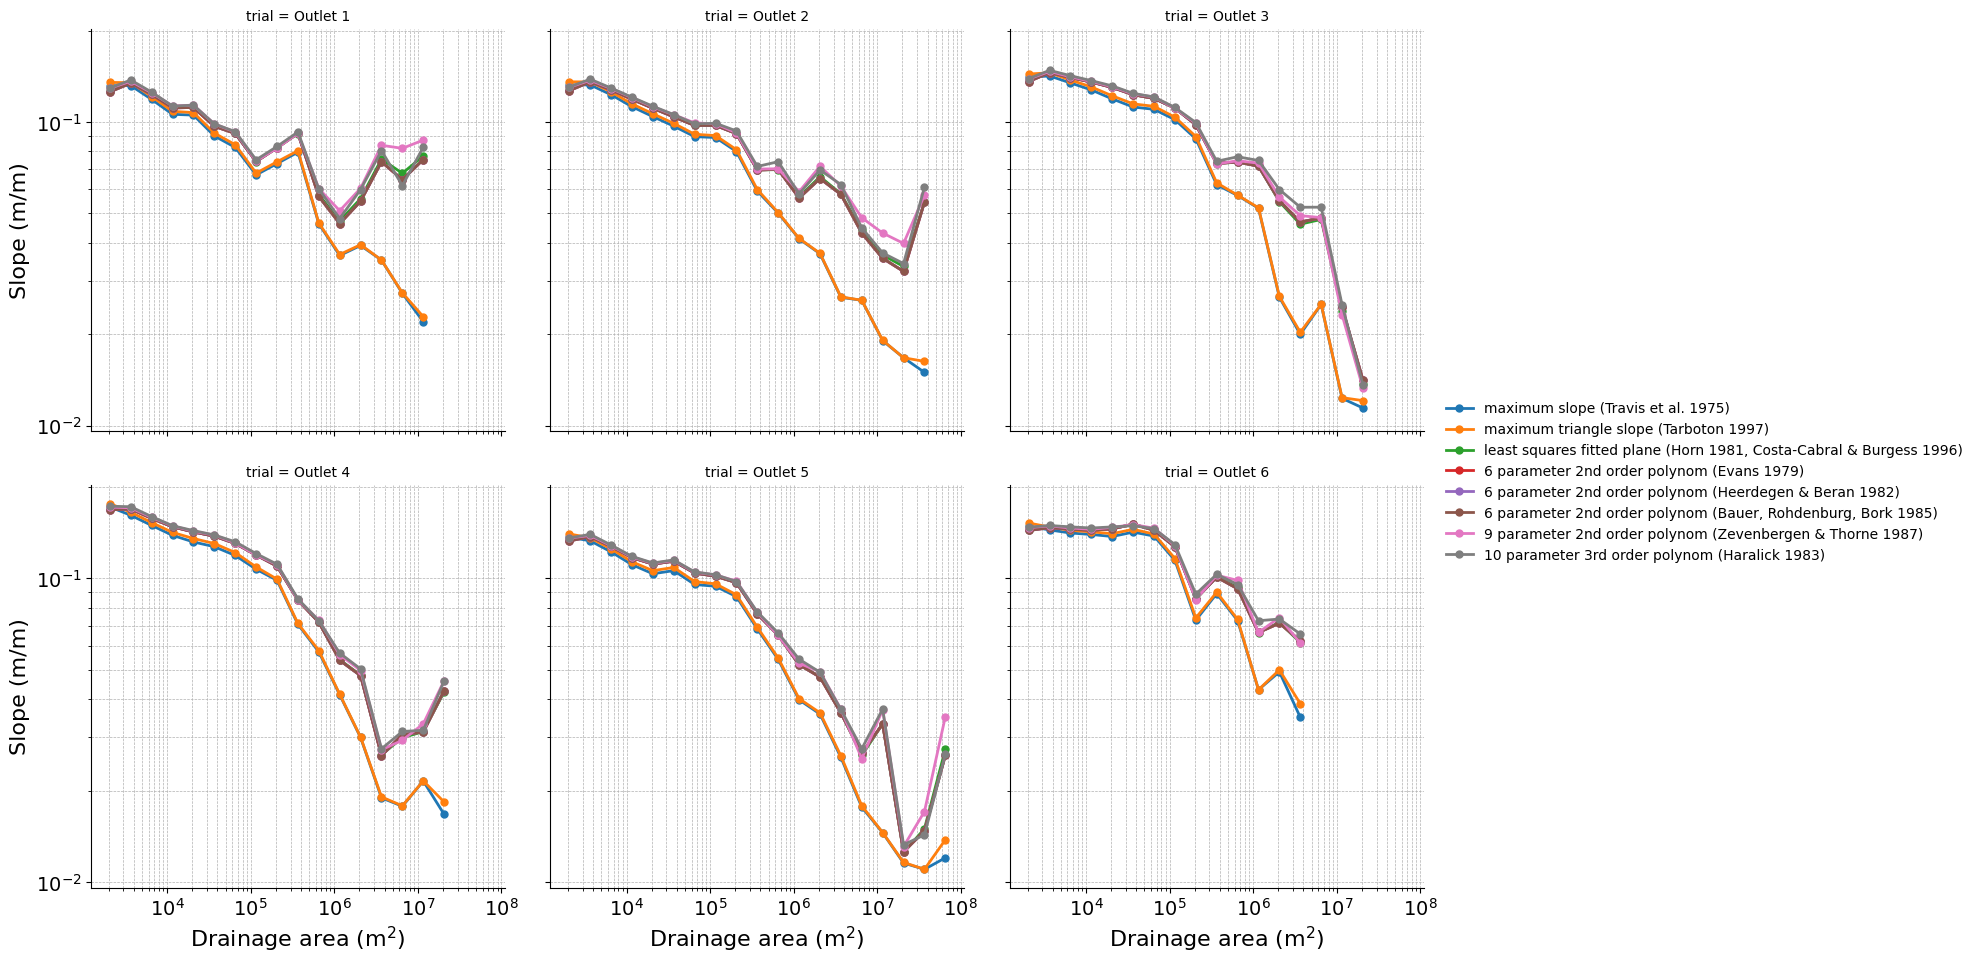

In [6]:
context = TrialFactoryContext(
    dem=dem, out_dir=out_dir_outlet, analysis=analysis_config
)
trials = OutletTrialFactory(
    context=context, outlets=outlets, resolution=None
).generate()
results = trials.run(max_workers)
grid = results.plot(config=plot_config, out_fig=out_fig_outlet)

Output()

**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************
**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior to
            running this tool.
**********************************************************************************


10:27:34 INFO slopeArea.slope_area.trial.TrialsExecutor               gather(): Gathering results of TrialsExecutor
10:27:34 INFO slopeArea.slope_area.plot      slope_area_grid(): Creating slope area plot with config SlopeAreaPlotConfig(hue=<Column.SLOPE_TYPE: 'slope_type'>, col=<Column.TRIAL_NAME: 'trial'>, row=None, log_interval=0.25, min_gradient=0.01, col_wrap=-1, height=5, aspect=1, title=None, xlabel='Drainage area (m$^2$)', ylabel='Slope (m/m)', label_font_size=16, title_font_size=10, tick_font_size=14, add_vlines=False, kind='line', grid=True, legend_font_size=10, legend_title='', legend=True, show=False)
10:27:34 INFO slopeArea.slope_area.plot         get_col_wrap(): Infered 3 cols for the plot
10:27:41 INFO slopeArea.slope_area.plot      slope_area_grid(): Saved slope area plot at /media/alex/alex/python-modules-packages-utils/slope-area/data/processed/03_custom_slope_providers/resolution/slope_area.png


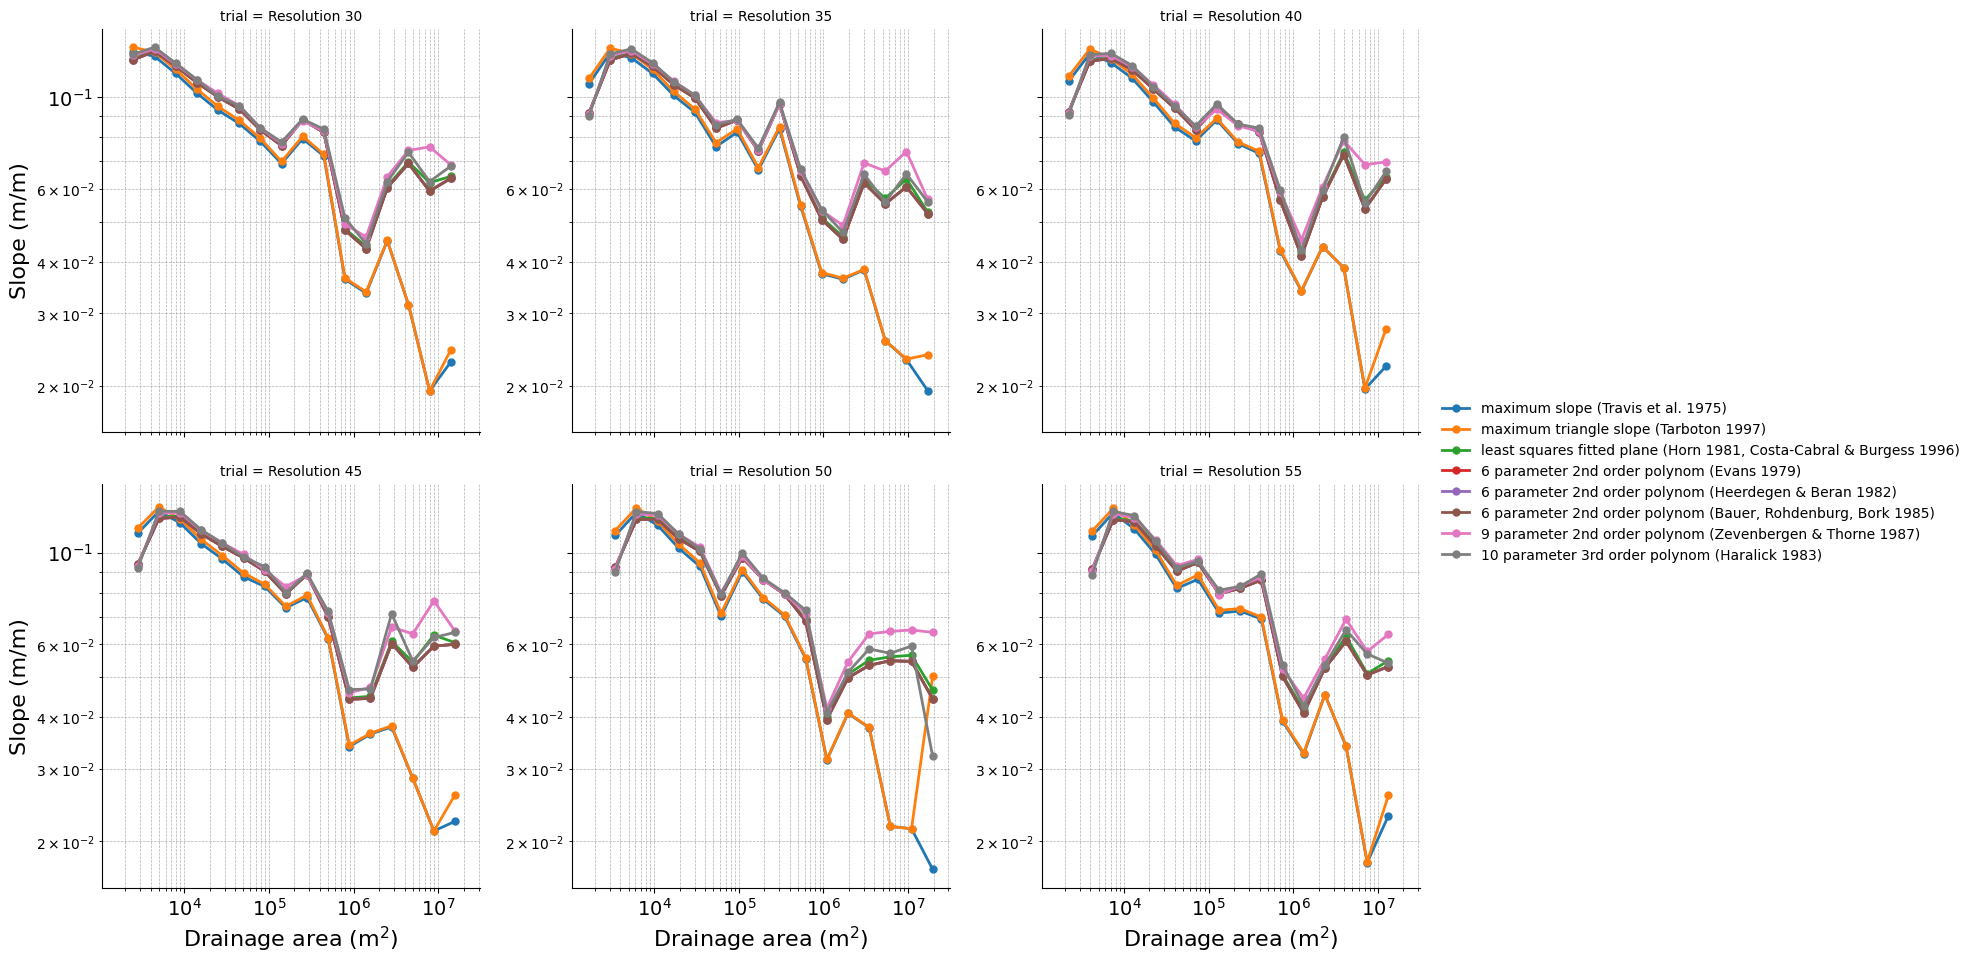

In [7]:
outlet = outlets[0]

context = TrialFactoryContext(
    dem=dem, out_dir=out_dir_resolution, analysis=analysis_config
)
trials = ResolutionTrialFactory(
    context=context, outlet=outlet, resolutions=resolutions
).generate()
results = trials.run(max_workers)
grid = results.plot(config=plot_config, out_fig=out_fig_resolution)